In [87]:
import numpy
import matplotlib
from matplotlib import pylab, mlab, pyplot
np = numpy
plt = pyplot

from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs

from pylab import *
from numpy import *

In [88]:
gt = open('GT.txt')
pred = open('predict_11.txt')

In [89]:
lineas_pred = pred.readlines()
lista_lineas_pred=[]
dict_lineas_pred={}
lista_lineas_pred_comun=[]

for linea in lineas_pred:
    #print(linea[:-1].split("\t"))
    val=[float(i)  for i in linea[:-1].split("\t")]
    if val[0]>33 and val[0]<67:
        if not val[1] in  dict_lineas_pred:
            dict_lineas_pred[val[1]]={"frame":[val[0]],"pos_x":[val[-2]],"pos_x2":[val[-2]],"pos_y":[val[-1]]}
        else:
            dict_lineas_pred[val[1]]["frame"].append(val[0])
            dict_lineas_pred[val[1]]["pos_x"].append(val[-2])
            dict_lineas_pred[val[1]]["pos_x2"].append(val[-4])
            dict_lineas_pred[val[1]]["pos_y"].append(val[-1])

    lista_lineas_pred.append(val)
    if val[1] in [1,2,3,5] and val[0]>33 and val[0]<67:
        lista_lineas_pred_comun.append(val)

In [90]:
lineas_gt = gt.readlines()
lista_lineas_gt=[]
dict_lineas_gt={}
for linea in lineas_gt:
    val=[float(i)  for i in linea[:-1].split("\t")]
    #print(dict_lineas_gt)
    if val[1] in  dict_lineas_gt:
        dict_lineas_gt[val[1]]["frame"].append(val[0])
        dict_lineas_gt[val[1]]["pos_x"].append(val[-2])
        dict_lineas_gt[val[1]]["pos_y"].append(val[-1])
    else:
    
        dict_lineas_gt[val[1]]={"frame":[val[0]],"pos_x":[val[-2]],"pos_y":[val[-1]]}
    #print(dict_lineas_gt)
    lista_lineas_gt.append(val)

In [91]:
print(len(lista_lineas_gt),len(lista_lineas_pred),len(lista_lineas_pred_comun))

132 541 132


In [92]:
cont=0
val_t=lista_lineas_gt[0][0]
for i in lista_lineas_gt:
    val_3=i[0]
    if val_3!=val_t:
        print(val_t,cont)
        val_t=val_3
        cont=1
    else:
        cont+=1

34.0 4
35.0 4
36.0 4
37.0 4
38.0 4
39.0 4
40.0 4
41.0 4
42.0 4
43.0 4
44.0 4
45.0 4
46.0 4
47.0 4
48.0 4
49.0 4
50.0 4
51.0 4
52.0 4
53.0 4
54.0 4
55.0 4
56.0 4
57.0 4
58.0 4
59.0 4
60.0 4
61.0 4
62.0 4
63.0 4
64.0 4
65.0 4


In [93]:
cont=0
val_t=lista_lineas_pred_comun[0][0]
for i in lista_lineas_pred_comun:
    val_3=i[0]
    if val_3!=val_t:
        print(val_t,cont)
        val_t=val_3
        cont=1
    else:
        cont+=1

34.0 4
35.0 4
36.0 4
37.0 4
38.0 4
39.0 4
40.0 4
41.0 4
42.0 4
43.0 4
44.0 4
45.0 4
46.0 4
47.0 4
48.0 4
49.0 4
50.0 4
51.0 4
52.0 4
53.0 4
54.0 4
55.0 4
56.0 4
57.0 4
58.0 4
59.0 4
60.0 4
61.0 4
62.0 4
63.0 4
64.0 4
65.0 4


# Test

    Para comprobar si funciona correctamente  comprobamos la correlación de las entradas cuanto mas se aproxime a una función lineal de pendiente 1  o -1 mejor y que el error cuadratico sea bajo

In [94]:
def MES(y_true,y_pred):
    return (np.square(y_true - y_pred)).mean()

def RMES(list1,lista2):
    return np.sqrt(MES(list1,lista2))

### Profundidad

In [101]:
#dict_lineas_gt
#dict_lineas_pred

# importamos el cálculo del error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error

profundidad=[]
for key_gt in dict_lineas_gt:
    print(key_gt)
    if key_gt!=12:
        real_val=np.array(dict_lineas_gt[key_gt]["pos_y"])+8*0.4
        if key_gt==6:
            key_gt=5

        pixl_val=np.array(dict_lineas_pred[key_gt]["pos_y"])
        
        print(len(real_val),len(pixl_val))
        # Predecimos los valores y para los datos usados en el entrenamiento
     
        # Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
        mse = mean_squared_error(y_true = real_val, y_pred = pixl_val)
        # La raíz cuadrada del MSE es el RMSE
        rmse = np.sqrt(mse)
        print('Error Cuadrático Medio (MSE) = ' + str(mse))
        print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))
        profundidad.append([real_val,pixl_val])

1.0
33 33
Error Cuadrático Medio (MSE) = 0.006580884436037817
Raíz del Error Cuadrático Medio (RMSE) = 0.08112265057330054
2.0
33 33
Error Cuadrático Medio (MSE) = 0.37690724130834147
Raíz del Error Cuadrático Medio (RMSE) = 0.6139277166803446
3.0
33 33
Error Cuadrático Medio (MSE) = 0.3022587149819066
Raíz del Error Cuadrático Medio (RMSE) = 0.5497806062257077
6.0
33 33
Error Cuadrático Medio (MSE) = 0.10772993060503673
Raíz del Error Cuadrático Medio (RMSE) = 0.32822237980527275


### EJE X

### Por Homografia

In [103]:
#dict_lineas_gt
#dict_lineas_pred

# importamos el cálculo del error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error

profundidad=[]
for key_gt in dict_lineas_gt:
    print(key_gt)
    if key_gt!=12:
        real_val=np.array(dict_lineas_gt[key_gt]["pos_x"])
        if key_gt==6:
            key_gt=5

        pixl_val=np.array(dict_lineas_pred[key_gt]["pos_x"])
        
        print(len(real_val),len(pixl_val))
        # Predecimos los valores y para los datos usados en el entrenamiento
     
        # Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
        mse = mean_squared_error(y_true = real_val, y_pred = pixl_val)
        # La raíz cuadrada del MSE es el RMSE
        rmse = np.sqrt(mse)
        print('Error Cuadrático Medio (MSE) = ' + str(mse))
        print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))
        profundidad.append([real_val,pixl_val])

1.0
33 33
Error Cuadrático Medio (MSE) = 0.10956399694182571
Raíz del Error Cuadrático Medio (RMSE) = 0.33100452707149747
2.0
33 33
Error Cuadrático Medio (MSE) = 0.8309574706007258
Raíz del Error Cuadrático Medio (RMSE) = 0.9115686867157766
3.0
33 33
Error Cuadrático Medio (MSE) = 0.23647419404932324
Raíz del Error Cuadrático Medio (RMSE) = 0.4862861236446329
6.0
33 33
Error Cuadrático Medio (MSE) = 0.14455700629328214
Raíz del Error Cuadrático Medio (RMSE) = 0.3802065311028759


### A traves del punto de convergencia

In [104]:
#dict_lineas_gt
#dict_lineas_pred

# importamos el cálculo del error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error

profundidad=[]
for key_gt in dict_lineas_gt:
    print(key_gt)
    if key_gt!=12:
        real_val=np.array(dict_lineas_gt[key_gt]["pos_x"])
        if key_gt==6:
            key_gt=5

        pixl_val=np.array(dict_lineas_pred[key_gt]["pos_x2"])
        
        print(len(real_val),len(pixl_val))
        # Predecimos los valores y para los datos usados en el entrenamiento
     
        # Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
        mse = mean_squared_error(y_true = real_val, y_pred = pixl_val)
        # La raíz cuadrada del MSE es el RMSE
        rmse = np.sqrt(mse)
        print('Error Cuadrático Medio (MSE) = ' + str(mse))
        print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))
        profundidad.append([real_val,pixl_val])

1.0
33 33
Error Cuadrático Medio (MSE) = 0.0041844548323840165
Raíz del Error Cuadrático Medio (RMSE) = 0.06468736223084086
2.0
33 33
Error Cuadrático Medio (MSE) = 42.08260304162737
Raíz del Error Cuadrático Medio (RMSE) = 6.487110531016669
3.0
33 33
Error Cuadrático Medio (MSE) = 25.157781847251215
Raíz del Error Cuadrático Medio (RMSE) = 5.015753367865212
6.0
33 33
Error Cuadrático Medio (MSE) = 0.714843318001932
Raíz del Error Cuadrático Medio (RMSE) = 0.8454840731805254


1.0
Error Cuadrático Medio (MSE) = 0.714843318001932
Raíz del Error Cuadrático Medio (RMSE) = 0.8454840731805254
2.0
Error Cuadrático Medio (MSE) = 0.714843318001932
Raíz del Error Cuadrático Medio (RMSE) = 0.8454840731805254
3.0
Error Cuadrático Medio (MSE) = 0.714843318001932
Raíz del Error Cuadrático Medio (RMSE) = 0.8454840731805254
6.0
Error Cuadrático Medio (MSE) = 0.714843318001932
Raíz del Error Cuadrático Medio (RMSE) = 0.8454840731805254


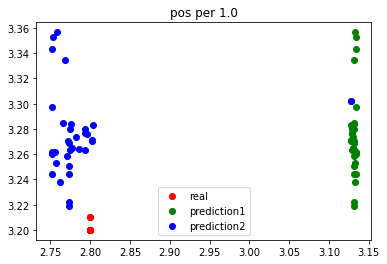

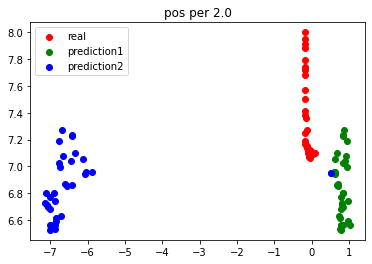

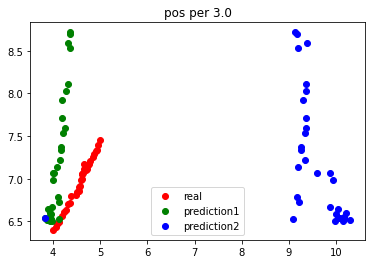

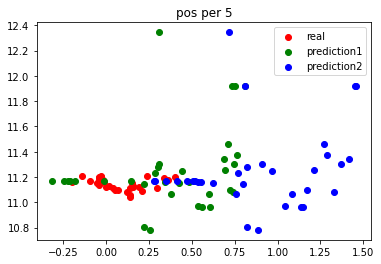

In [122]:
profundidad=[]
for key_gt in dict_lineas_gt:
    print(key_gt)
    if key_gt!=12:
        real_valx=np.array(dict_lineas_gt[key_gt]["pos_x"])
        real_valy=np.array(dict_lineas_gt[key_gt]["pos_y"])+8*0.4
        if key_gt==6:
            key_gt=5
        
        pixl_valy=np.array(dict_lineas_pred[key_gt]["pos_y"])
        pixl_valx=np.array(dict_lineas_pred[key_gt]["pos_x2"])
        
        pixl_valx2=np.array(dict_lineas_pred[key_gt]["pos_x"])
        
        
        plt.figure()
        plt.scatter(real_valx,real_valy,label='real', color='red')
        plt.scatter(pixl_valx2,pixl_valy,label='prediction1', color='green')
        plt.scatter(pixl_valx,pixl_valy,label='prediction2', color='blue')
        plt.legend()
        plt.title('pos per '+str(key_gt))

        # Predecimos los valores y para los datos usados en el entrenamiento
     
        # Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
        mse = mean_squared_error(y_true = real_val, y_pred = pixl_val)
        # La raíz cuadrada del MSE es el RMSE
        rmse = np.sqrt(mse)
        print('Error Cuadrático Medio (MSE) = ' + str(mse))
        print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))
        profundidad.append([real_val,pixl_val])